 #  **A Whale off the Port(folio)**
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

**# Data Cleaning**

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## **Whale Returns**

**Read the Whale Portfolio daily returns and clean the data**

In [2]:
# Reading whale returns
whale_returns = Path("Resources/whale_returns.csv")
whale_ret_df = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

whale_ret_df.head()  

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [3]:
# Checking file information:
whale_ret_df.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


In [4]:
# Count nulls
whale_ret_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_ret_df = whale_ret_df.dropna()

In [6]:
# Validating all nulls have been dropped
whale_ret_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
whale_ret_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

## **Algorithmic Daily Returns**

**Read the algorithmic daily returns and clean the data**

In [8]:
# Reading algorithmic returns
algo_returns = Path("Resources/algo_returns.csv")
algo_ret_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

algo_ret_df.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [9]:
# Checking file information:
algo_ret_df.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


In [10]:
# Count nulls
algo_ret_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algo_ret_df = algo_ret_df.dropna()

In [12]:
# Checking file information:
algo_ret_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [13]:
algo_ret_df.head()

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761

## **S&P 500 Returns**

**Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data.**

In [14]:
# Reading S&P 500 Closing Prices
sp500_history = Path("Resources/sp500_history.csv")
sp500_hist_df = pd.read_csv(sp500_history, index_col="Date", infer_datetime_format=True, parse_dates=True)

sp500_hist_df.head()

Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06

In [15]:
sp500_histo_df = sp500_hist_df.sort_values(by=['Date'])
sp500_histo_df.head(10)

Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93
2012-10-08  $1455.88
2012-10-09  $1441.48
2012-10-10  $1432.56
2012-10-11  $1432.84
2012-10-12  $1428.59

In [16]:
sp500_histo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [17]:
# Check Data Types
sp500_histo_df['Close'].dtype

dtype('O')

In [18]:
# Eliminating $ from [Close]
sp500_histo_df['Close'] = sp500_histo_df['Close'].str.replace('$', '')
sp500_historic_df = sp500_histo_df
sp500_historic_df['Close']

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object

In [19]:
# Confirm Data Types
sp500_historic_df['Close'].dtype

dtype('O')

In [20]:
# Fix Data Typesaa
sp500_historic_df['Close'] = sp500_historic_df['Close'].astype('float')
sp500_historic_df['Close'].dtype

dtype('float64')

In [21]:
# Calculate Daily Returns
sp500_dayret = sp500_historic_df.pct_change()
sp500_dayret.head()

Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322

In [22]:
# Drop nulls
sp500_dayret = sp500_dayret.dropna()

In [23]:
# Checking file information:
sp500_dayret.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1648 entries, 2012-10-02 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1648 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [24]:
# Rename `Close` Column to be specific to this portfolio.
sp500_dayret = sp500_dayret.rename(columns={
    "Close": "SP500"})
sp500_dayret.head()

SP500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

## **Combine Whale, Algorithmic, and S&P 500 Returns**

In [25]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([algo_ret_df, whale_ret_df, sp500_dayret], axis="columns", join="inner")

combined_df.columns = ['Algo_1', 'Algo_2', 'SFM._LLC', 'P_&_CO.INC', 'TGM._LLC', 'BH_INC', 'S&P500']
combined_df.head()

Algo_1    Algo_2  SFM._LLC  P_&_CO.INC  TGM._LLC    BH_INC  \
Date                                                                       
2015-03-03 -0.001942 -0.000949 -0.001266   -0.004981 -0.000496 -0.006569   
2015-03-04 -0.008589  0.002416  0.002230    0.003241 -0.002534  0.004213   
2015-03-05 -0.000955  0.004323  0.004016    0.004076  0.002355  0.006726   
2015-03-06 -0.004957 -0.011460 -0.007905   -0.003574 -0.008481 -0.013098   
2015-03-09 -0.005447  0.001303  0.000582    0.004225  0.005843 -0.001652   

              S&P500  
Date                  
2015-03-03 -0.004539  
2015-03-04 -0.004389  
2015-03-05  0.001196  
2015-03-06 -0.014174  
2015-03-09  0.003944

---

# **Conduct Quantitative Analysis**

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## **Performance Anlysis**

#### **Calculate and Plot the daily returns.**

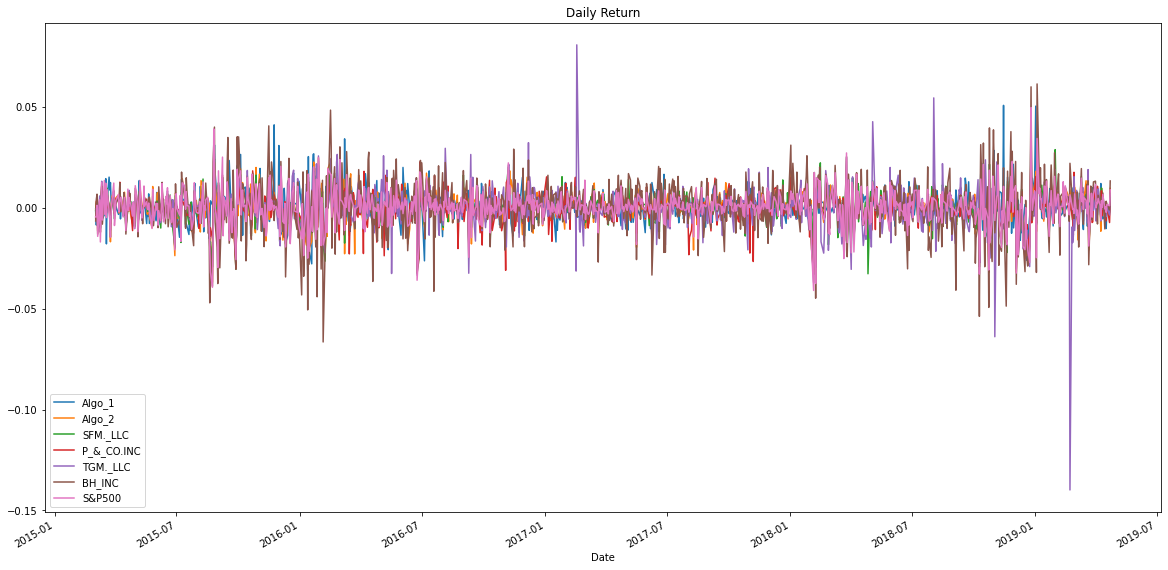

In [26]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10), title = "Daily Return").legend(loc='lower left');

#### **Calculate and Plot cumulative returns.**

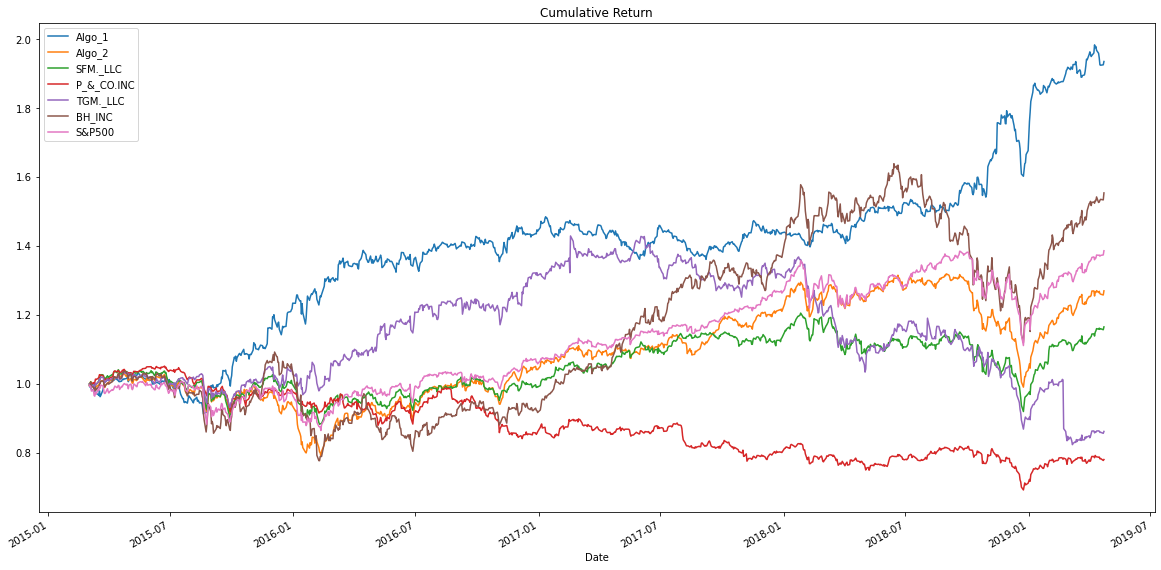

In [27]:
# Calculate cumulative returns of all portfolios
#cumulative_returns = (1 + daily_returns).cumprod()
#cumulative_returns.head()
# Plot cumulative returns
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot(figsize=(20,10), title = "Cumulative Return");

### Cumulative Return Plot: In this graph we can see portfolios Algo_1 and BH_Inc have cumulative returns bigger than S&P 500, being Algo_1 the one with the Highest cumulative return over all, and P_G_Co_Inc the portfolio with the lowest cumulative return over all.

---

## **Risk Analysis**

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### **Create a box plot for each portfolio**


P_&_CO.INC   -0.000214
TGM._LLC     -0.000083
SFM._LLC      0.000177
Algo_2        0.000263
S&P500        0.000349
BH_INC        0.000506
Algo_1        0.000662
dtype: float64

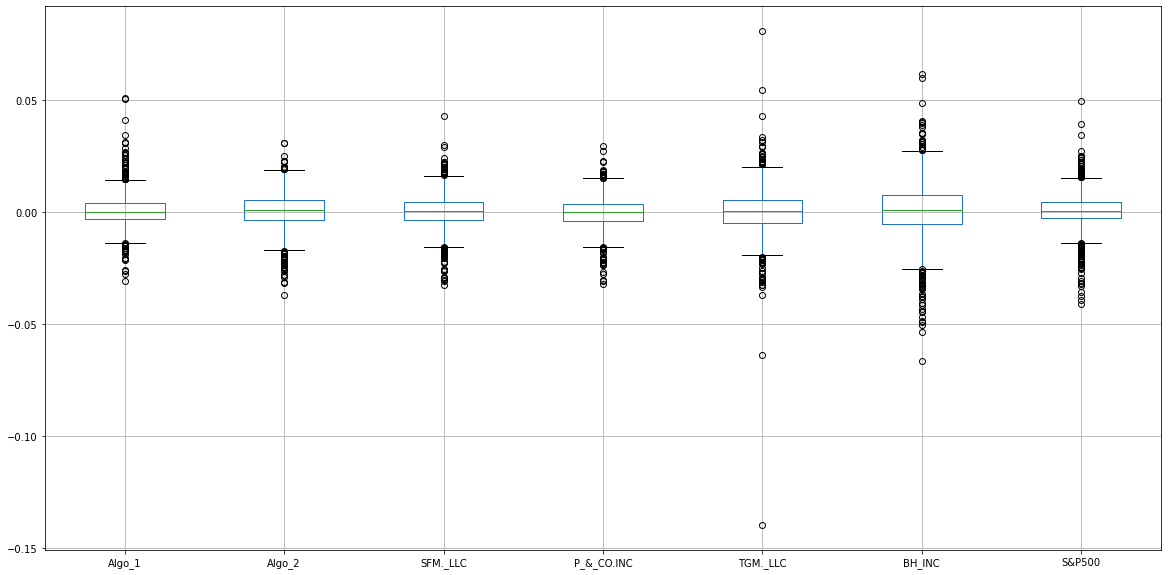

In [28]:
# Box plot to visually show risk

combined_df.boxplot(figsize=(20,10));
combined_df.mean().sort_values()

### Box Plot is used to visualize how a given data is distributed using quartiles. As larger the data as volatil the portfolio is. We can see that “TIGER GLOBAL MANAGEMENT LLC” and “BERKSHIRE HATHAWAY INC” show their data is more expreded out than the other portfolios, is more volatil. Higher volatility bigger the risk. The Portfolio Algo_1, also shows high volatility.

### **Calculate Standard Deviations**


In [29]:
# Calculate the daily standard deviations of all portfolios
#from daily_returns
combined_df.head()

Algo_1    Algo_2  SFM._LLC  P_&_CO.INC  TGM._LLC    BH_INC  \
Date                                                                       
2015-03-03 -0.001942 -0.000949 -0.001266   -0.004981 -0.000496 -0.006569   
2015-03-04 -0.008589  0.002416  0.002230    0.003241 -0.002534  0.004213   
2015-03-05 -0.000955  0.004323  0.004016    0.004076  0.002355  0.006726   
2015-03-06 -0.004957 -0.011460 -0.007905   -0.003574 -0.008481 -0.013098   
2015-03-09 -0.005447  0.001303  0.000582    0.004225  0.005843 -0.001652   

              S&P500  
Date                  
2015-03-03 -0.004539  
2015-03-04 -0.004389  
2015-03-05  0.001196  
2015-03-06 -0.014174  
2015-03-09  0.003944

In [30]:
#Standar daily deviation
daily_std = combined_df.std().sort_values()  
daily_std 

P_&_CO.INC    0.007023
Algo_1        0.007620
SFM._LLC      0.007895
Algo_2        0.008342
S&P500        0.008554
TGM._LLC      0.010894
BH_INC        0.012919
dtype: float64

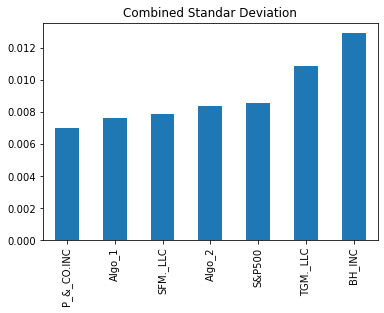

In [31]:
daily_std.plot(kind="bar", title="Combined Standar Deviation");

#### The standard deviation measures the dispersion of a data set relative to its mean. The more spread out the data, the higher the standard deviation. Standard deviation measures portfolio risk . In the Daily STD Bar Plot we can see that “TIGER GLOBAL MANAGEMENT LLC” and “BERKSHIRE HATHAWAY INC” show the highest volatility, and P_&_Co_Inc shows the lowest one.

### **Determine which portfolios are riskier than the S&P 500**

In [32]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_df['S&P500'].std()
print("S&P500 Daily Standar Deviation = ", sp500_std)

S&P500 Daily Standar Deviation =  0.008553731597758204


In [33]:
combined_df.std() > sp500_std

Algo_1        False
Algo_2        False
SFM._LLC      False
P_&_CO.INC    False
TGM._LLC       True
BH_INC         True
S&P500        False
dtype: bool

### **Calculate the Annualized Standard Deviation**

In [34]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = (daily_std * np.sqrt(252)).sort_values()
annualized_std.head(10)

P_&_CO.INC    0.111488
Algo_1        0.120967
SFM._LLC      0.125335
Algo_2        0.132430
S&P500        0.135786
TGM._LLC      0.172936
BH_INC        0.205077
dtype: float64

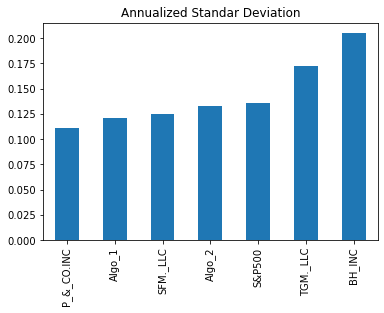

In [35]:
annualized_std.plot(kind="bar", title="Annualized Standar Deviation");

---

## **Rolling Statistics**

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### **Calculate and plot rolling `std` for all portfolios with 21-day window**

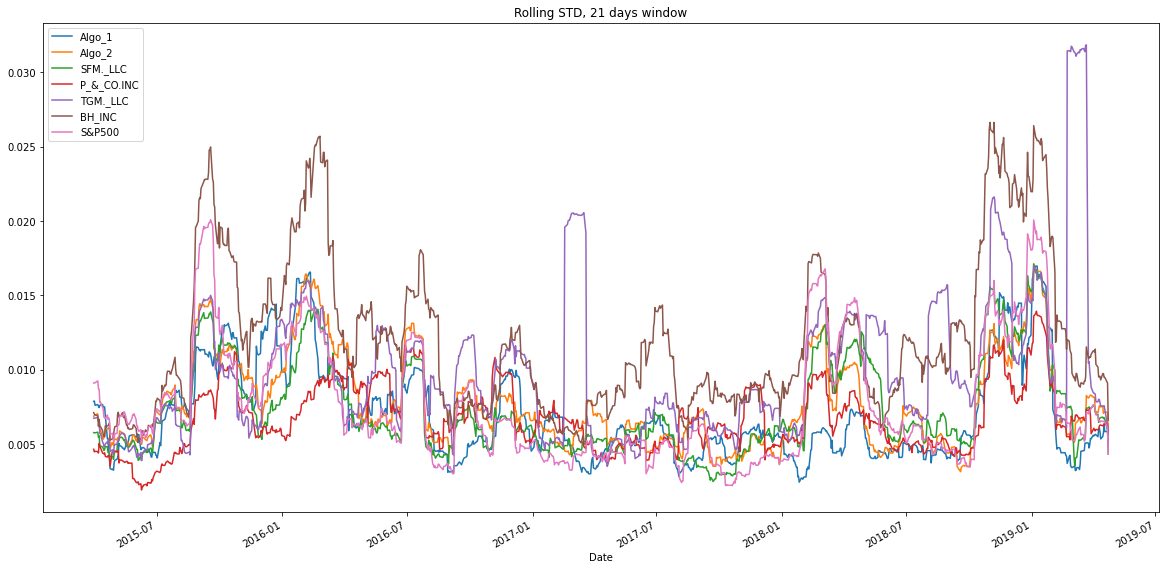

In [36]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation

combined_df.rolling(window=21).std().plot(figsize=(20,10), title = "Rolling STD, 21 days window");

#### **Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500**


In [37]:
# Calculate the correlation
# Display de correlation matrix

correlation = combined_df.corr()
correlation

Algo_1    Algo_2  SFM._LLC  P_&_CO.INC  TGM._LLC    BH_INC  \
Algo_1      1.000000  0.288243  0.321211    0.268840  0.164387  0.292033   
Algo_2      0.288243  1.000000  0.826873    0.678152  0.507414  0.688082   
SFM._LLC    0.321211  0.826873  1.000000    0.699914  0.561243  0.754360   
P_&_CO.INC  0.268840  0.678152  0.699914    1.000000  0.434479  0.545623   
TGM._LLC    0.164387  0.507414  0.561243    0.434479  1.000000  0.424423   
BH_INC      0.292033  0.688082  0.754360    0.545623  0.424423  1.000000   
S&P500      0.279494  0.858764  0.837864    0.669732  0.623946  0.751371   

              S&P500  
Algo_1      0.279494  
Algo_2      0.858764  
SFM._LLC    0.837864  
P_&_CO.INC  0.669732  
TGM._LLC    0.623946  
BH_INC      0.751371  
S&P500      1.000000

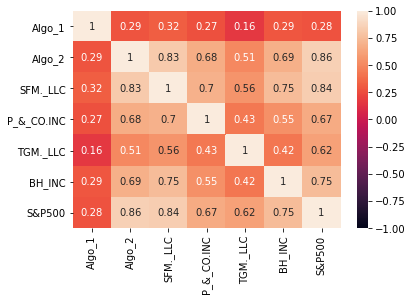

In [38]:
# Using 'heatmap` function to visualize correlations
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True);

#### Answer:  The portfolio that mimic the S&P 500 behavior  is __Algo_2, followed by SFM_LLC

### **Calculate and Plot Beta for a chosen portfolio and the S&P 500**
#### I choose portfolio Algo_1

In [39]:
# Calculate covariance of a single portfolio

Algo_1_cov = combined_df['Algo_1'].cov(combined_df['S&P500'])

print(f"Algo_1_cov = {Algo_1_cov}")

Algo_1_cov = 1.8217749991632826e-05


In [40]:
# Calculate variance of S&P 500

sp500_variance = combined_df['S&P500'].var()

print(f"S&P 500 Variance = {sp500_variance}")

S&P 500 Variance = 7.316632424648712e-05


In [41]:
# Computing beta
# Calculating beta of all daily returns of Algo 1

Algo_1_beta = Algo_1_cov / sp500_variance

print(f"Algo_1_beta = {Algo_1_beta}")

Algo_1_beta = 0.24899091459425748


### **Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500**

#### I choose Portfolio Algo_1

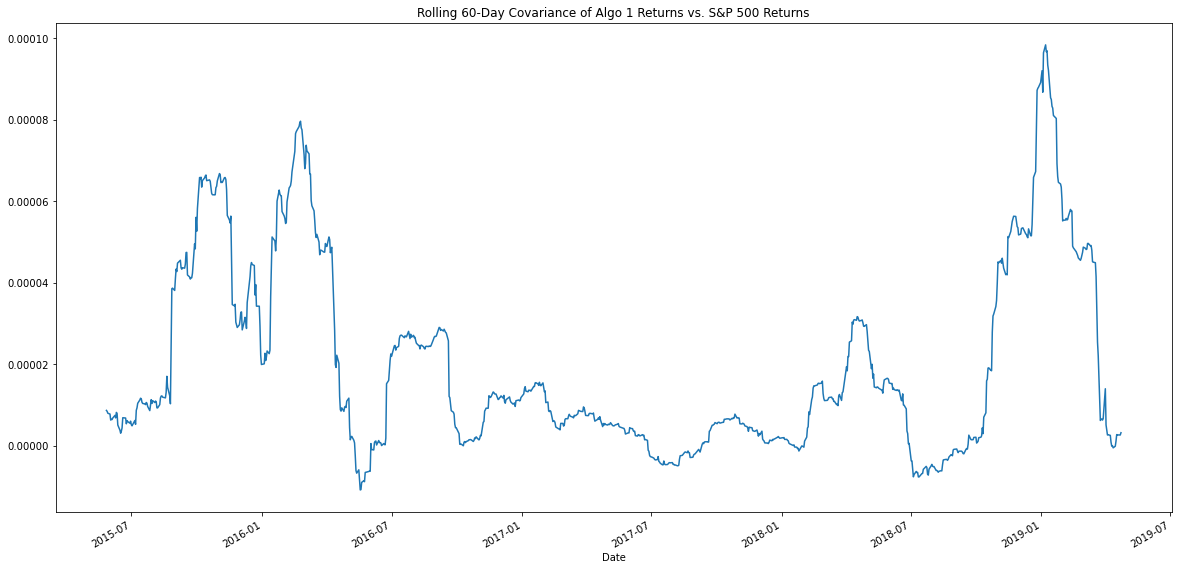

In [42]:
# Calculate 30-day rolling covariance of Algo 1 vs. S&P 500 and plot the data
rolling_covariance_60 = combined_df['Algo_1'].rolling(window=60).cov(combined_df['S&P500'])
rolling_covariance_60.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Algo 1 Returns vs. S&P 500 Returns');

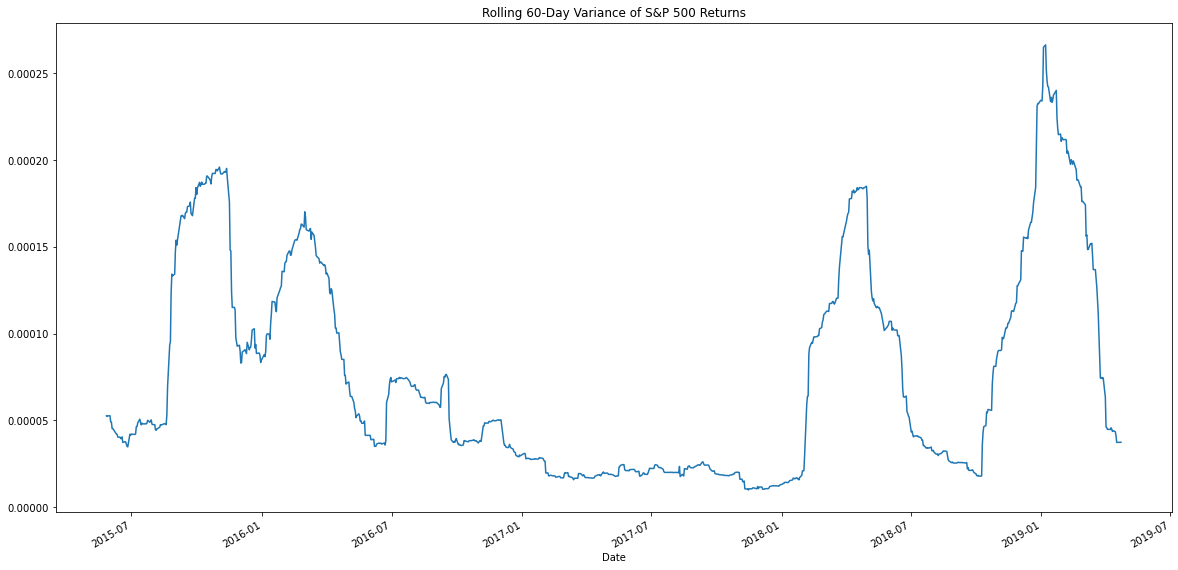

In [43]:
# Calculate 30-day rolling variance of Algo 1 vs. S&P 500 and plot the data
rolling_variance_60 = combined_df['S&P500'].rolling(window=60).var()
rolling_variance_60.plot(figsize=(20, 10), title='Rolling 60-Day Variance of S&P 500 Returns');

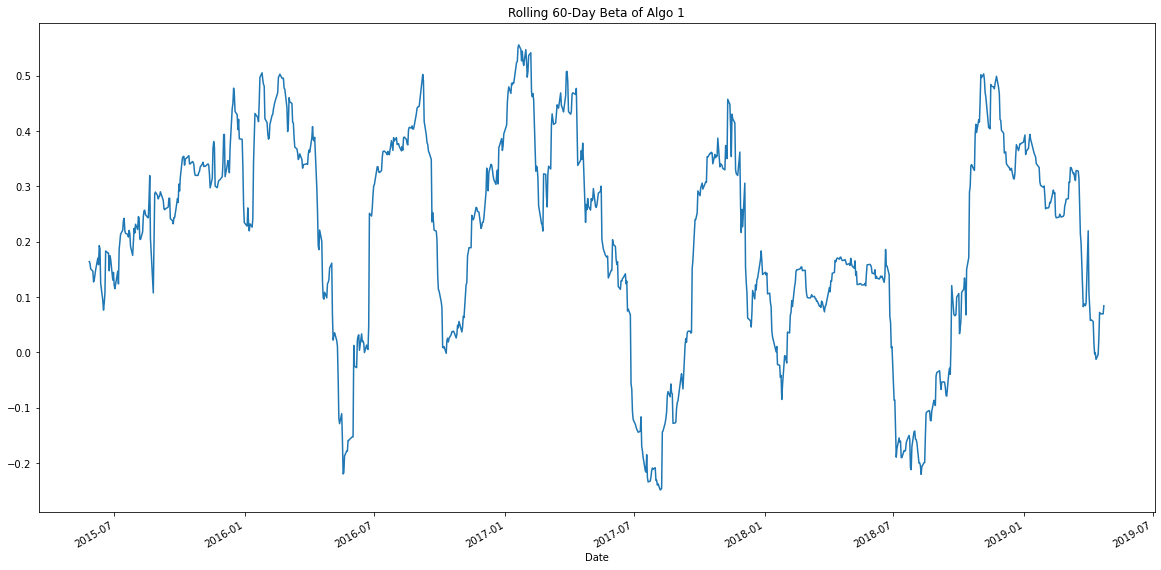

In [44]:
# Calculate 30-day rolling beta of Algo 1 and plot the data
rolling_beta_60 = rolling_covariance_60 / rolling_variance_60
rolling_beta_60.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1');

### In the Rolling 60-Day Beta of Algo_1 vs S&P 500 we can see how disperse are Algo_1 data is from S&P500 data. Algo_1 has a high volatility and does not follow the Market(S&P 500) 

## **Rolling Statistics Challenge: Exponentially Weighted Average**

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

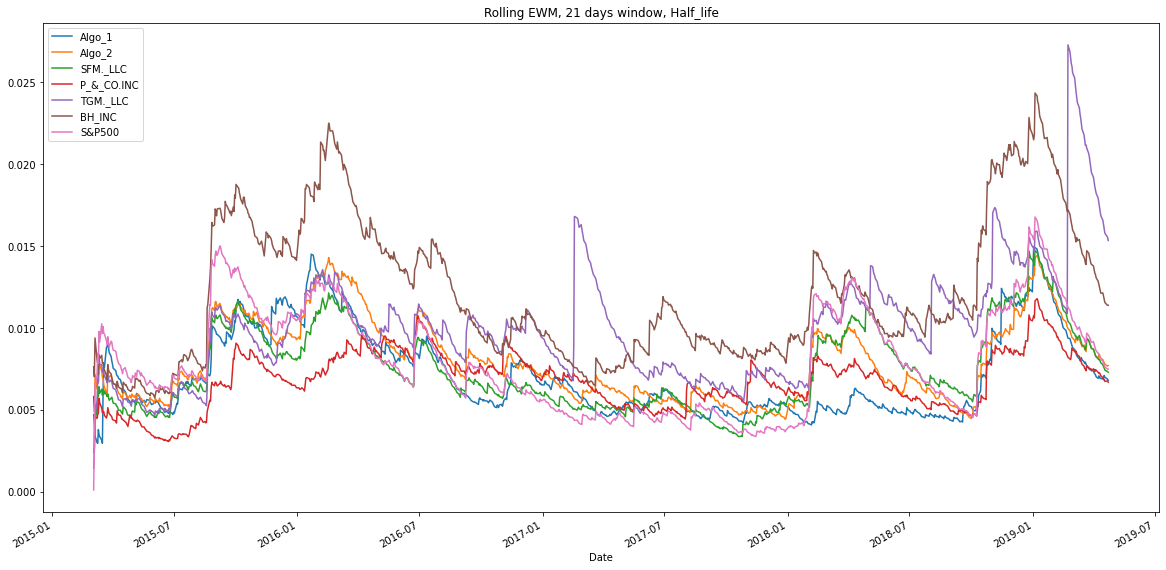

In [45]:
# Use `ewm` to calculate the rolling window
# https://www.statology.org/exponential-moving-average-pandas/

combined_df.ewm(halflife=21).std().plot(figsize=(20,10), title='Rolling EWM, 21 days window, Half_life');

#### This Rolling EWN Plot also corraborate the high volatility for TGM_LLC and BH__Inc and the lowest volatility for P_&_Co_Inc

---

# **Sharpe Ratios**


### **Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot**

In [46]:
# Annualized Sharpe Ratios

sharpe_ratios = (combined_df.mean()*252) / (combined_df.std()*np.sqrt(252))
sharpe_ratios 

Algo_1        1.378648
Algo_2        0.501364
SFM._LLC      0.356417
P_&_CO.INC   -0.483570
TGM._LLC     -0.121060
BH_INC        0.621810
S&P500        0.648267
dtype: float64

In [47]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.sort_values(inplace = True)
sharpe_ratios

P_&_CO.INC   -0.483570
TGM._LLC     -0.121060
SFM._LLC      0.356417
Algo_2        0.501364
BH_INC        0.621810
S&P500        0.648267
Algo_1        1.378648
dtype: float64

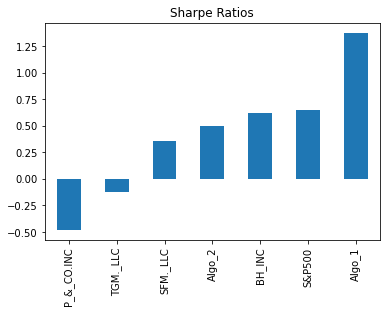

In [48]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios");

### **Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.**

#### Answer: Yes, The Algorithmic Strategies outperform both, The market (S&P500) and The Whales Portfolios. The Algorithmic Strategies present a High Volatility and high return and It does not behave like the market, It represent the best strategy due to Portfolio Algo_1 who has the best performance in terms of volatility and accumulated return.

---

# **Create Custom Portfolio**

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## **Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.**

For this project, I fetch data from three companies listed in the S&P 500 index.

* `AMZN` - [Amazon.com, Inc.](https://en.wikipedia.org/wiki/Amazon_(company))

* `KO` - [Coca-Cola](https://en.wikipedia.org/wiki/Coca-Cola)

* `TSLA` - [Tesla, Inc](https://en.wikipedia.org/wiki/Tesla,_Inc.)

In [49]:
# Reading data from 1st stock

amzn_data = Path("Resources/Amazon.csv")
amzn_data_df = pd.read_csv(amzn_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

amzn_data_df.head()  

AMZN - Close
Date                    
2018-05-11       1602.91
2018-05-14       1601.54
2018-05-15       1576.12
2018-05-16       1587.28
2018-05-17       1581.76

In [50]:
# Reading data from 2nd stock

ko_data = Path("Resources/Coca-Cola.csv")
ko_data_df = pd.read_csv(ko_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

ko_data_df.head() 

KO Close
Date                
2018-05-11     42.14
2018-05-14     42.04
2018-05-15     41.72
2018-05-16     41.55
2018-05-17     42.30

In [51]:
# Reading data from 3rd stock

tsla_data = Path("Resources/Tesla.csv")
tsla_data_df = pd.read_csv(tsla_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

tsla_data_df.head()   

TSLA - Close
Date                    
2018-05-11         60.21
2018-05-14         58.39
2018-05-15         56.84
2018-05-16         57.30
2018-05-17         56.91

In [52]:
# Combine all stocks in a single DataFrame
personal_df = pd.concat([amzn_data_df, ko_data_df, tsla_data_df], axis="columns", join="inner")
personal_df

AMZN - Close  KO Close  TSLA - Close
Date                                            
2018-05-11       1602.91     42.14         60.21
2018-05-14       1601.54     42.04         58.39
2018-05-15       1576.12     41.72         56.84
2018-05-16       1587.28     41.55         57.30
2018-05-17       1581.76     42.30         56.91
...                  ...       ...           ...
2019-05-02       1900.82     48.39         48.82
2019-05-03       1962.46     48.72         51.01
2019-05-06       1950.55     48.47         51.07
2019-05-07       1921.00     48.00         49.41
2019-05-08       1917.77     47.85         48.97

[249 rows x 3 columns]

In [53]:
# Reset Date index
personal_df.sort_index(inplace=True)
personal_df.head(10)

AMZN - Close  KO Close  TSLA - Close
Date                                            
2018-05-11       1602.91     42.14         60.21
2018-05-14       1601.54     42.04         58.39
2018-05-15       1576.12     41.72         56.84
2018-05-16       1587.28     41.55         57.30
2018-05-17       1581.76     42.30         56.91
2018-05-18       1574.37     42.30         56.91
2018-05-21       1585.46     42.41         56.90
2018-05-22       1581.40     42.25         55.00
2018-05-23       1601.86     42.40         55.81
2018-05-24       1603.07     42.32         55.57

In [54]:
# Reorganize portfolio data by having a column per symbol
personal_df.columns = ['AMZN','KO','TSLA']

personal_df.head()

AMZN     KO   TSLA
Date                             
2018-05-11  1602.91  42.14  60.21
2018-05-14  1601.54  42.04  58.39
2018-05-15  1576.12  41.72  56.84
2018-05-16  1587.28  41.55  57.30
2018-05-17  1581.76  42.30  56.91

In [55]:
# Calculate daily returns

daily_per_returns = personal_df.pct_change()
daily_per_returns.head()

# Drop NAs
daily_per_returns.isnull()

daily_per_returns = daily_per_returns.dropna()

# Display sample data
daily_per_returns

AMZN        KO      TSLA
Date                                    
2018-05-14 -0.000855 -0.002373 -0.030228
2018-05-15 -0.015872 -0.007612 -0.026546
2018-05-16  0.007081 -0.004075  0.008093
2018-05-17 -0.003478  0.018051 -0.006806
2018-05-18 -0.004672  0.000000  0.000000
...              ...       ...       ...
2019-05-02 -0.005598 -0.004116  0.043162
2019-05-03  0.032428  0.006820  0.044859
2019-05-06 -0.006069 -0.005131  0.001176
2019-05-07 -0.015150 -0.009697 -0.032504
2019-05-08 -0.001681 -0.003125 -0.008905

[248 rows x 3 columns]

## **Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock**

In [56]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_per_returns.dot(weights)

# Display sample data

 
portfolio_returns.head()


Date
2018-05-14   -0.011152
2018-05-15   -0.016677
2018-05-16    0.003700
2018-05-17    0.002589
2018-05-18   -0.001557
dtype: float64

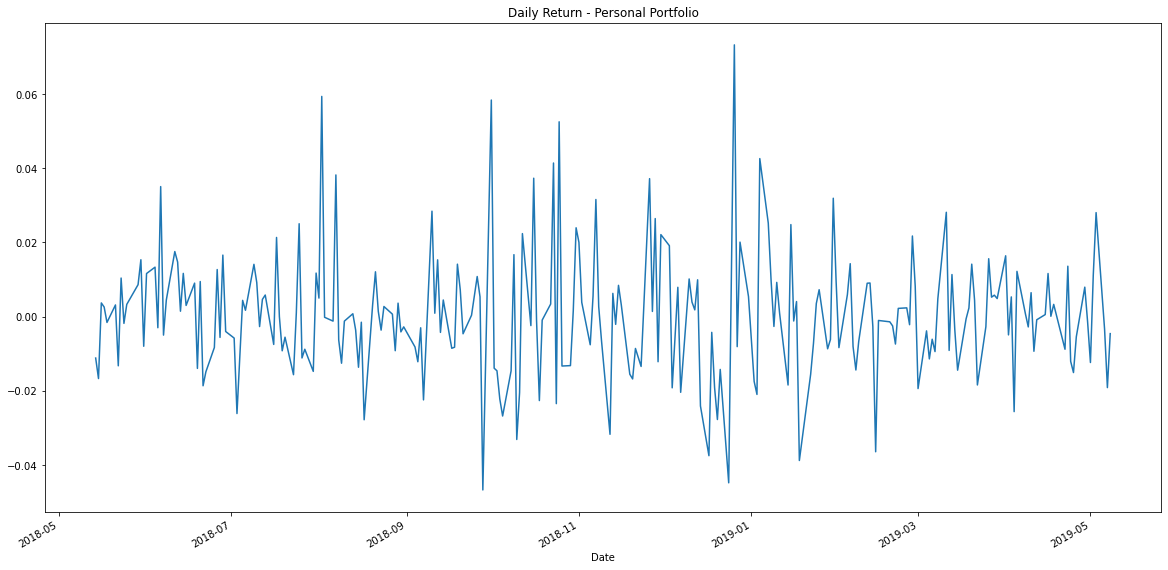

In [57]:
portfolio_returns.plot(figsize=(20,10), title = "Daily Return - Personal Portfolio");

## **Join your portfolio returns to the DataFrame that contains all of the portfolio returns**

In [58]:
# Join your returns DataFrame to the original returns DataFrame
Joined_df = pd.concat([algo_ret_df, whale_ret_df, sp500_dayret, portfolio_returns], axis="columns", join="inner")
Joined_df.columns= ['Algo_1', 'Algo_2', 'SFM._LLC', 'P_&_CO.INC', 'TGM._LLC', 'BH_INC', 'S&P500', "Personal_Port"]

In [59]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
Joined_df.isnull()

Algo_1  Algo_2  SFM._LLC  P_&_CO.INC  TGM._LLC  BH_INC  S&P500  \
Date                                                                         
2018-05-14   False   False     False       False     False   False   False   
2018-05-15   False   False     False       False     False   False   False   
2018-05-16   False   False     False       False     False   False   False   
2018-05-17   False   False     False       False     False   False   False   
2018-05-18   False   False     False       False     False   False   False   
...            ...     ...       ...         ...       ...     ...     ...   
2019-04-16   False   False     False       False     False   False   False   
2019-04-17   False   False     False       False     False   False   False   
2019-04-18   False   False     False       False     False   False   False   
2019-04-22   False   False     False       False     False   False   False   
2019-04-23   False   False     False       False     False   False   False   

            Personal_Port  
Date                       
2018-05-14          False  
2018-05-15          False  
2018-05-16          False  
2018-05-17          False  
2018-05-18          False  
...                   ...  
2019-04-16          False  
2019-04-17          False  
2019-04-18          False  
2019-04-22          False  
2019-04-23          False  

[237 rows x 8 columns]

In [60]:
Joined_df_clean = Joined_df.dropna()
Joined_df_clean

Algo_1    Algo_2  SFM._LLC  P_&_CO.INC  TGM._LLC    BH_INC  \
Date                                                                       
2018-05-14  0.000915  0.001635  0.000000    0.000000  0.000000  0.000000   
2018-05-15 -0.001135 -0.001139 -0.000726   -0.001409 -0.003189 -0.014606   
2018-05-16 -0.002326  0.003341  0.008637    0.006244  0.005480  0.004310   
2018-05-17 -0.006949  0.005205 -0.001955    0.002524 -0.006267 -0.005140   
2018-05-18  0.002557 -0.002496 -0.004357   -0.002672 -0.012832 -0.002212   
...              ...       ...       ...         ...       ...       ...   
2019-04-16 -0.006945  0.002899  0.002699    0.000388 -0.000831  0.000837   
2019-04-17 -0.010301 -0.005228 -0.002897   -0.006467 -0.004409  0.003222   
2019-04-18 -0.000588 -0.001229  0.001448    0.001222  0.000582  0.001916   
2019-04-22  0.000677 -0.001936 -0.002586   -0.007333 -0.003640 -0.001088   
2019-04-23  0.004969  0.009622  0.007167    0.003485  0.006472  0.013278   

              S&P500  Personal_Port  
Date                                 
2018-05-14  0.000884      -0.011152  
2018-05-15 -0.006842      -0.016677  
2018-05-16  0.004061       0.003700  
2018-05-17 -0.000856       0.002589  
2018-05-18 -0.002632      -0.001557  
...              ...            ...  
2019-04-16  0.000509       0.011625  
2019-04-17 -0.002274       0.000101  
2019-04-18  0.001579       0.003308  
2019-04-22  0.001012      -0.008783  
2019-04-23  0.008841       0.013595  

[237 rows x 8 columns]

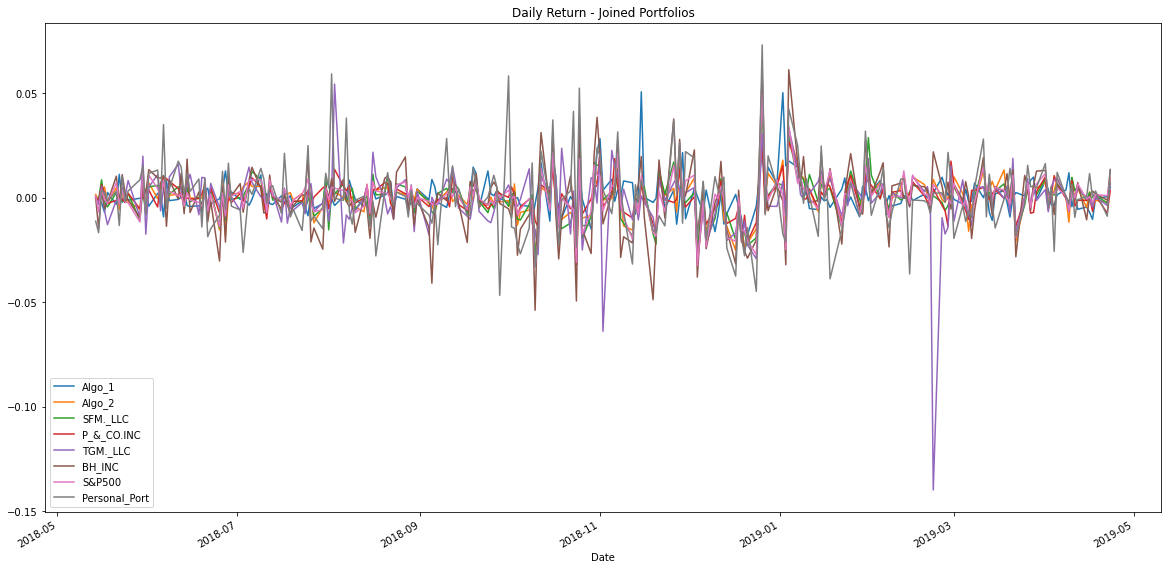

In [61]:
Joined_df_clean.plot(figsize=(20,10), title = "Daily Return - Joined Portfolios").legend(loc='lower left');

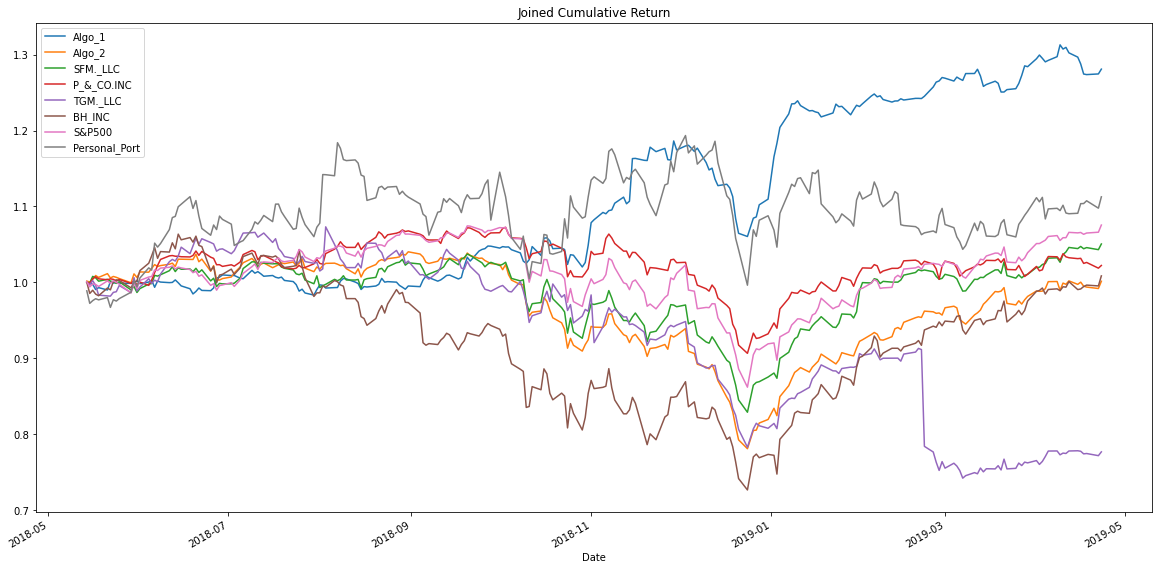

In [62]:
Joined_df_clean_cum = (1 + Joined_df_clean).cumprod()
Joined_df_clean_cum.plot(figsize=(20,10), title = "Joined Cumulative Return");

#### My Persnal Portfolio has a better cumulative return that S&P 500, but less than portfolio Algo_1, who keeps the highest cumulative return.

## **Re-run the risk analysis with your portfolio to see how it compares to the others**

### **Calculate the Annualized Standard Deviation**

In [63]:
# Daily Standard Deviations
Joined_std = Joined_df_clean.std()
Joined_std.head(10).sort_values()

P_&_CO.INC       0.007353
Algo_1           0.008423
Algo_2           0.008791
SFM._LLC         0.009240
S&P500           0.009578
TGM._LLC         0.014648
BH_INC           0.015569
Personal_Port    0.016951
dtype: float64

In [64]:
# Calculate the annualized `std`
annualized_join_std = Joined_std * np.sqrt(252)
annualized_join_std.head(10).sort_values()

P_&_CO.INC       0.116732
Algo_1           0.133704
Algo_2           0.139556
SFM._LLC         0.146675
S&P500           0.152054
TGM._LLC         0.232531
BH_INC           0.247155
Personal_Port    0.269083
dtype: float64

### **Calculate and plot rolling `std` with 21-day window**

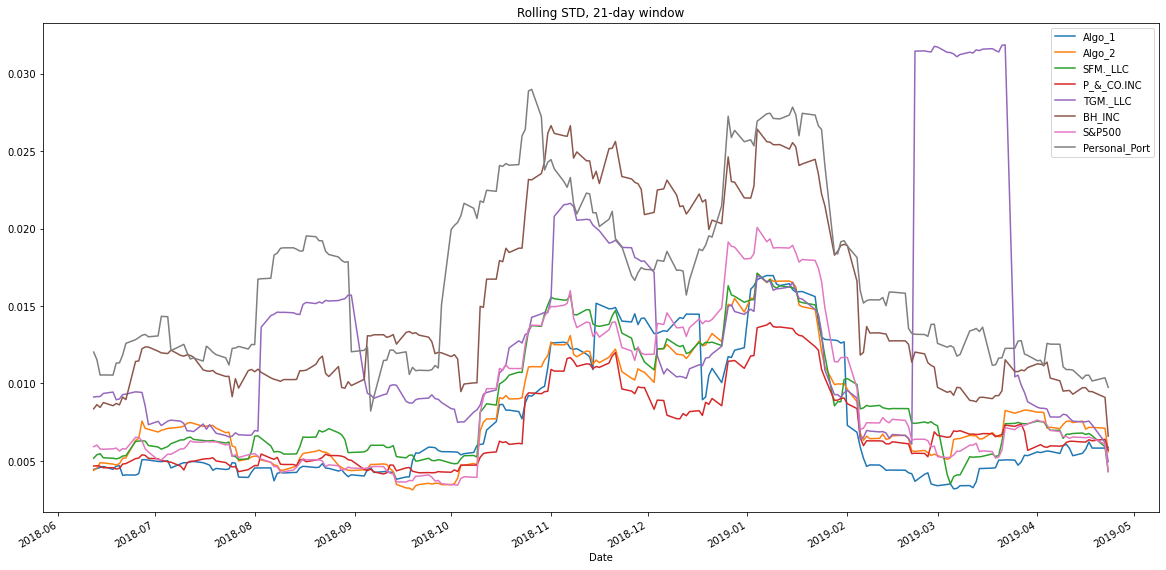

In [65]:
# Calculate rolling standard deviation

Joined_df_clean.rolling(window=21).std().plot(figsize=(20,10), title = "Rolling STD, 21-day window");

# Plot rolling standard deviation


#### My Personal Portfolio has the highest volatility over all

### **Calculate and plot the correlation**

In [66]:
# Calculate and plot the correlation
Joined_correlation = Joined_df_clean.corr()
Joined_correlation

Algo_1    Algo_2  SFM._LLC  P_&_CO.INC  TGM._LLC    BH_INC  \
Algo_1         1.000000  0.365512  0.337826    0.361301  0.114554  0.327000   
Algo_2         0.365512  1.000000  0.862846    0.783656  0.409496  0.782804   
SFM._LLC       0.337826  0.862846  1.000000    0.791962  0.478627  0.816675   
P_&_CO.INC     0.361301  0.783656  0.791962    1.000000  0.485375  0.650758   
TGM._LLC       0.114554  0.409496  0.478627    0.485375  1.000000  0.325457   
BH_INC         0.327000  0.782804  0.816675    0.650758  0.325457  1.000000   
S&P500         0.289358  0.875721  0.876981    0.766680  0.481030  0.852303   
Personal_Port  0.188837  0.559919  0.565531    0.458588  0.302511  0.642136   

                 S&P500  Personal_Port  
Algo_1         0.289358       0.188837  
Algo_2         0.875721       0.559919  
SFM._LLC       0.876981       0.565531  
P_&_CO.INC     0.766680       0.458588  
TGM._LLC       0.481030       0.302511  
BH_INC         0.852303       0.642136  
S&P500         1.000000       0.660479  
Personal_Port  0.660479       1.000000

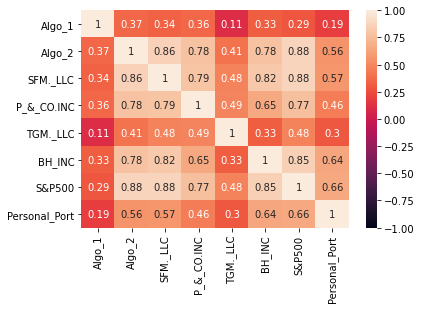

In [67]:
sns.heatmap(Joined_correlation, vmin=-1, vmax=1, annot=True);

#### My Personal Potfolio does not follow the market S&P 500

### **Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500**

In [68]:
# Calculate and plot Beta
Pport_covariance = portfolio_returns.cov(sp500_dayret['SP500'])
Pport_covariance

0.00010723654410358122

In [69]:
Joined_variance = sp500_dayret['SP500'].var()
Joined_variance

6.579270583158746e-05

In [70]:
# Calculate beta of all daily returns of AMZN
AMZN_beta = Pport_covariance / Joined_variance
AMZN_beta

1.6299153948475598

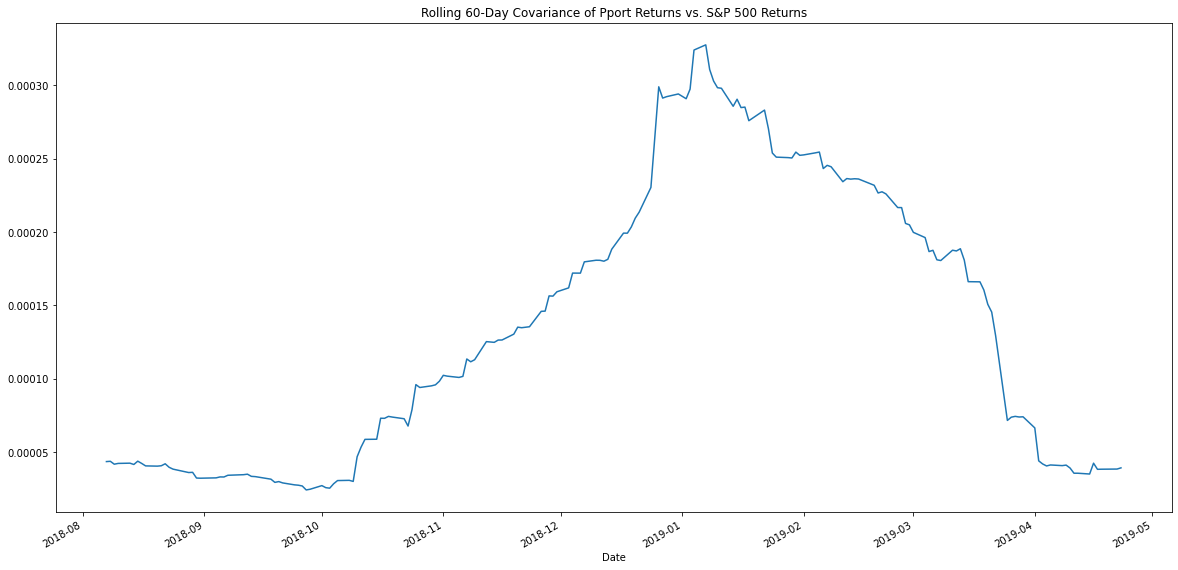

In [71]:
# Calculate 60-day rolling covariance of AMZN vs. S&P 500 and plot the data
J_rolling_covariance = portfolio_returns.rolling(window=60).cov(sp500_dayret['SP500'])
J_rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Pport Returns vs. S&P 500 Returns');

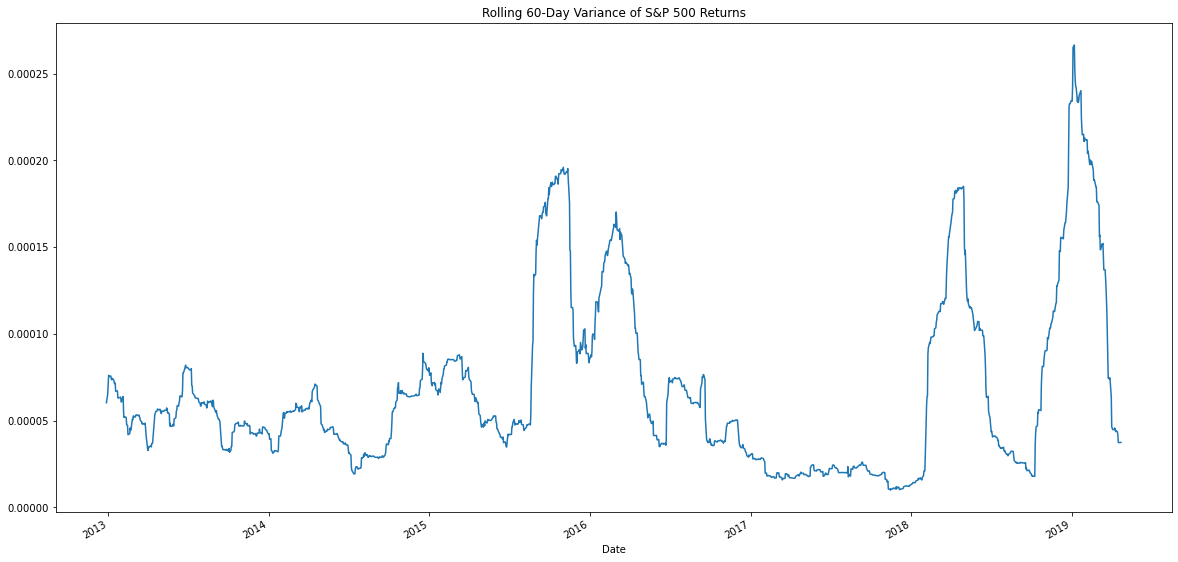

In [72]:
# Calculate 60-day rolling variance of AMZN vs. S&P 500 and plot the data
J_rolling_variance = sp500_dayret['SP500'].rolling(window=60).var()
J_rolling_variance.plot(figsize=(20, 10), title='Rolling 60-Day Variance of S&P 500 Returns');

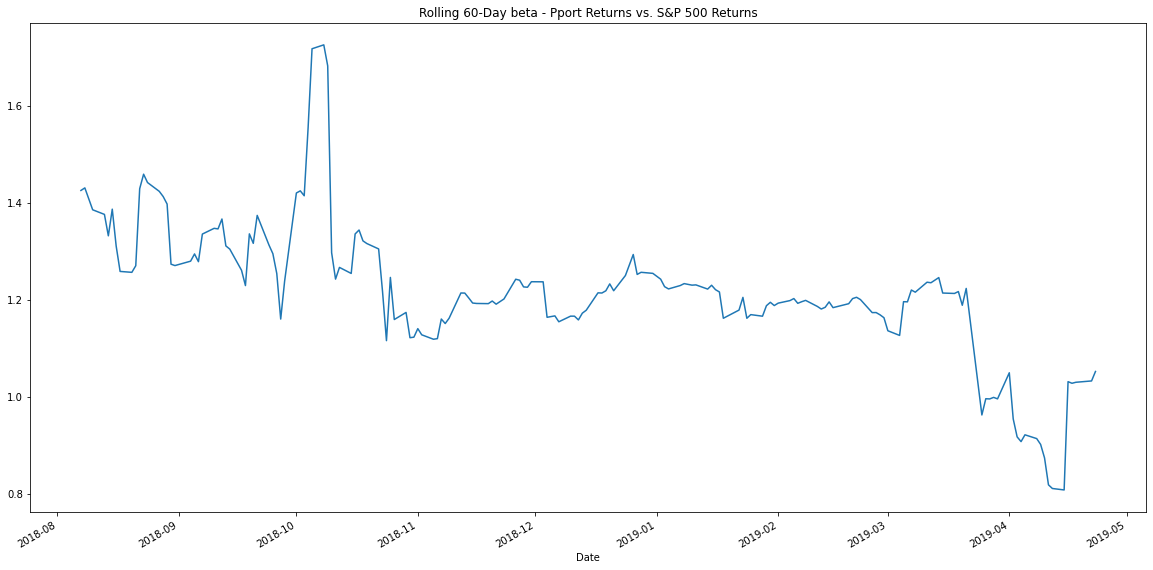

In [73]:
J_rolling_beta = J_rolling_covariance / J_rolling_variance
J_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day beta - Pport Returns vs. S&P 500 Returns');

### **Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot**

In [74]:
# Calculate Annualzied Sharpe Ratios
Joined_sharpe_ratios = (Joined_df_clean.mean()*252) / (Joined_df_clean.std()*np.sqrt(252))
Joined_sharpe_ratios.sort_values()

TGM._LLC        -1.034216
Algo_2           0.080607
BH_INC           0.159756
P_&_CO.INC       0.258738
SFM._LLC         0.430713
Personal_Port    0.554959
S&P500           0.584820
Algo_1           2.035665
dtype: float64

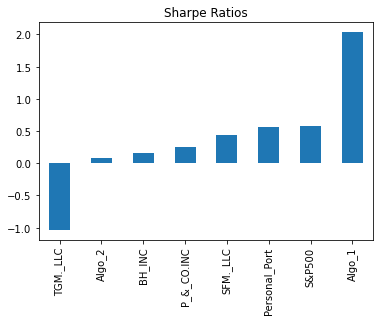

In [75]:
# Visualize the sharpe ratios as a bar plot
Joined_sharpe_ratios.sort_values().plot(kind="bar", title="Sharpe Ratios");

### **How does your portfolio do?**

#### Answer: My portfolio (AMZN, TSLA, KO) did not outperform the Algorithmic Strategies, but it has a high volatility and good Sharpe Ratio, making it a good investment due its good  risk/reward results (cumulate return was higher tha S&P 500)

## **Summary**

* In the Cumulative Return Plot we can see portfolios Algo_1 and BH_Inc have cumulative returns bigger than S&P 500, being Algo_1 the one with the Highest cumulative return over all, otherwise, P_G_Co_Inc was the portfolio with the lowest cumulative return over all..

* In the Box Plot we could visualized the distribution of the data and conclude that “TIGER GLOBAL MANAGEMENT LLC” and “BERKSHIRE HATHAWAY INC” data are more expreded out or present more volatility. Higher volatility bigger the risk. The Portfolio Algo_1 also shows high volatility.

* As “TIGER GLOBAL MANAGEMENT LLC” and “BERKSHIRE HATHAWAY INC” has showed the highest dispersion of a dataset they have the higher the standard deviation. Otherwise, P_&_Co_Inc shows the lowest STD.

* The Correlation PLOT showed that the portfolio that mimic the S&P 500 behavior is __Algo_2, followed by SFM_LLC.

* In the Rolling 60-Day Beta of Algo 1' vs S&P 500 we can see how disperse are Algo_1 data from S&P500 data. Algo_1 has a high volatility and does not follow the Market(S&P 500) 

* The Rolling EWN Plot also corroborate the high volatility for TGM_LLC and BH__Inc and the lowest volatility for P_&_C.

* The Algorithmic Strategies (Algo_1 and Algo_2) outperform both, The market (S&P500) and The Whales Portfolios. The Algorithmic Strategies present a High Volatility and high accumulative return. It does not behave like the market, It represents the best strategy thanks to Portfolio Algo_1 who has the best performance in terms of volatility and accumulated return.

* My Personal Portfolio has has the highest volatility over all and a better cumulative return than S&P 500, but less than portfolio Algo_1, who keeps the best cumulative return.

* My portfolio (AMZN, TSLA, KO) is a good investment due its good risk/reward results (cumulate return was higher tha S&P 500).
